In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('2018_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,2.636746e+09,103792000.0,-0.004,-0.02910,0.673,190855000.0,0.0000,0.0,-26.687113,0,Technology
1,5.361960e+09,853769000.0,0.073,-0.25870,-8.191,523610000.0,0.0000,0.0,-42.583392,0,Consumer Cyclical
2,1.798500e+09,412100000.0,-0.158,-0.07130,4.204,404200000.0,0.0085,13000000.0,66.143385,1,Basic Materials
3,5.816440e+08,479440000.0,0.284,0.17450,4.448,427656000.0,0.0000,29000.0,-9.197867,0,Energy
4,1.589000e+09,84532000.0,0.044,0.07485,9.939,303107000.0,0.0000,0.0,100.552499,1,Basic Materials
...,...,...,...,...,...,...,...,...,...,...,...
1726,6.966000e+06,3331000.0,0.305,0.06250,18.620,4573000.0,0.0193,0.0,11.671183,1,Financial Services
1727,2.307974e+07,6089738.0,0.080,0.06010,9.580,2302113.0,0.0000,0.0,-3.076927,0,Consumer Defensive
1728,3.546600e+07,5710000.0,0.031,0.01090,5.464,6593000.0,0.0000,0.0,27.118650,1,Consumer Cyclical
1729,0.000000e+00,2986000.0,0.044,0.35880,1.618,-816000.0,0.0000,38000.0,-22.159090,0,Healthcare


In [3]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield", "R&D Expenses"]])
X = predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
# Create the param grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,6],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}


In [5]:
rf_Model = RandomForestClassifier()

In [6]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [7]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   57.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 12.2min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 14.3min

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 104, 108, 112, 116, 120, 124,
                                          128, 132, 136, 140, 144, 148, 152,
                                          156, 160, 164, 168, 172, 176, 180,
                                          184, 188, 192, 196, 201, 205, 209,
                                          213, 217, ...]},
             verbose=2)

In [10]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 180}

In [11]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.715
Test Accuracy - : 0.741


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7149460708782742
True Postitive Rate 		: 0.9683406113537117
True Negative Rate 		: 0.10732984293193717
False Negative Rate 		: 0.03165938864628821
False Postitive Rate 		: 0.8926701570680629

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7413394919168591
True Postitive Rate 		: 0.9747634069400631
True Negative Rate 		: 0.10344827586206896
False Negative Rate 		: 0.025236593059936908
False Postitive Rate 		: 0.896551724137931



<AxesSubplot:>

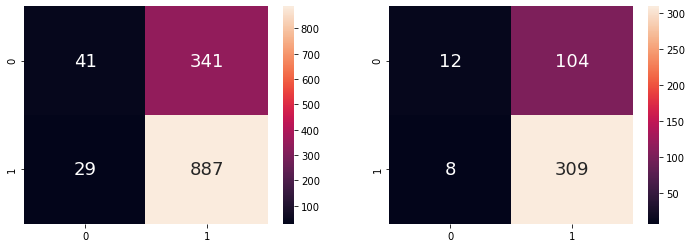

In [16]:
# Predict Response corresponding to Predictors
y_train_pred = rf_Grid.predict(X_train)
y_test_pred = rf_Grid.predict(X_test)

train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])